<a href="https://colab.research.google.com/github/ImperB-riven/Data-Visualization/blob/main/19110035_DV_TH04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bài tập

Thực hành trên Altar
1. Read dataset googleplaystore.csv
2. Remove the row chứa value NA (missing value)
3. Vẽ biểu đồ bar plot, biểu diễn số lượng app của mỗi thể loại trong cột **Content Rating**
4. Vẽ một heatmap để biểu diễn số lượng app trên toàn ứng dụng phạm vi của **Category** và **Rating**
5. Merge code của barchart và heatmap. Và vẽ biểu đồ biểu diễn cả 2 plots linked.

## 1

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import altair as alt

In [4]:
data = pd.read_csv('googleplaystore.csv', sep = ',')
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## 2

In [5]:
data = data.dropna()
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## 3

In [6]:
count_of_records = data['Content Rating'].value_counts()
count_of_records = pd.DataFrame(count_of_records)
count_of_records

,Content Rating
Everyone,7414
Teen,1084
Mature 17+,461
Everyone 10+,397
Adults only 18+,3
Unrated,1


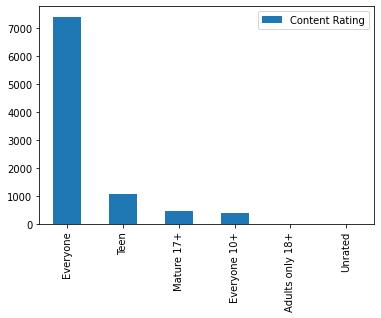

In [7]:
count_of_records.plot.bar()

In [8]:
count_of_records.index

Index(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+', 'Adults only 18+',
       'Unrated'],
      dtype='object')

In [9]:
count_of_records.reset_index()

,index,Content Rating
0,Everyone,7414
1,Teen,1084
2,Mature 17+,461
3,Everyone 10+,397
4,Adults only 18+,3
5,Unrated,1


In [10]:
alt.Chart(count_of_records.reset_index()).mark_bar().encode(
    x = 'index:O',
    y = 'Content Rating:Q'
)

alt.Chart(...)

## 4

In [11]:
source = data.groupby('Category')['Rating'].value_counts()
source = pd.DataFrame(source)
source.columns = ['Total Apps']

source.columns = source.columns.get_level_values(0)

source = source.reset_index()

source

,Category,Rating,Total Apps
0,ART_AND_DESIGN,4.7,13
1,ART_AND_DESIGN,4.4,8
2,ART_AND_DESIGN,4.1,7
3,ART_AND_DESIGN,4.2,7
4,ART_AND_DESIGN,4.8,5
...,...,...,...
763,WEATHER,4.8,3
764,WEATHER,3.5,2
765,WEATHER,3.3,1
766,WEATHER,3.6,1


In [18]:
alt.Chart(source).mark_rect().encode(
 x = alt.X('Category'),
 y = alt.Y('Rating:Q'),
 color = alt.Color('Total Apps:Q')
)

alt.Chart(...)


## 5

In [22]:
# tạo selection
selected_region = alt.selection(type="single", encodings=['x'])

# heatmap
heatmap = alt.Chart(source).mark_rect().encode(
 x = alt.X('Category:N'),
 y = alt.Y('Rating:Q', scale = alt.Scale(domain = [1, 5])),
 color = alt.Color('count():Q', scale = alt.Scale(domain = [0, 50, 200]))
).properties(
 width=350
)

# scale -> circles
circles = heatmap.mark_point().encode(
    alt.ColorValue('grey'),
    alt.Size('count()',
    legend=alt.Legend(title='Apps in Selection')
    )
)

bars = alt.Chart(count_of_records.reset_index()).mark_bar().encode(
    x = 'index:O',
    y = 'Content Rating:Q'
)

heatmap + circles | bars

alt.HConcatChart(...)